Visualization and kNN assignement - Avery Anderson

Visualization: Q1
1.Load the ./data/college_completion.csv data with Pandas.
2.What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [26]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/college_completion.csv',low_memory=False) #read in data

In [7]:
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [11]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables
print(df.columns, '\n') # Column names

(3798, 63) 

index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentil

This dataset has 3798 recorded observations for 63 different variables all surrounding completion of college. A majority of the variables involve transfer rates. There are also a lot a variables giving information about each school such as geographic location, endowments and graduation rates. 

Cross tabulate control and level. Describe the patterns you see.

In [13]:
cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


It looks like a majority of private not for profit schools are 4-year instituions while most public schools are 2 year programs. Private for profit has the most even split between 2 and 4 year programs. 

For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

Axes(0.125,0.11;0.775x0.77) 



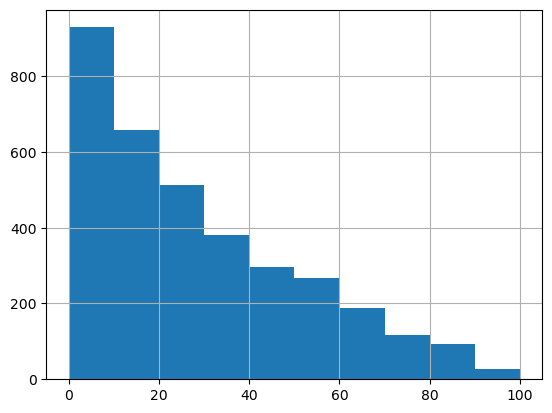

In [16]:
print(df['grad_100_value'].hist(), '\n') 

<Axes: ylabel='Density'>

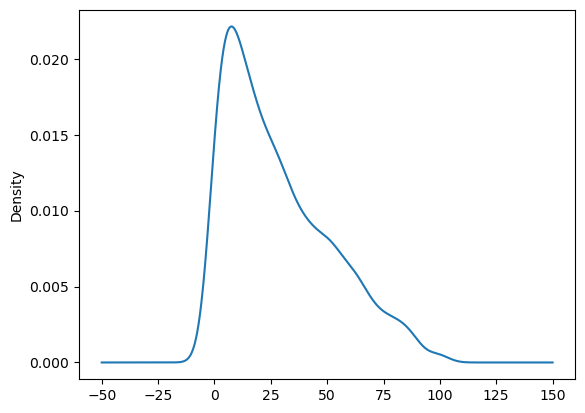

In [18]:
df['grad_100_value'].plot.kde()

<Axes: >

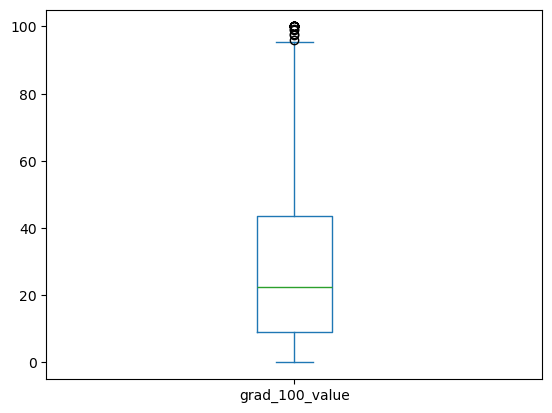

In [20]:
df['grad_100_value'].plot.box()

In [22]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

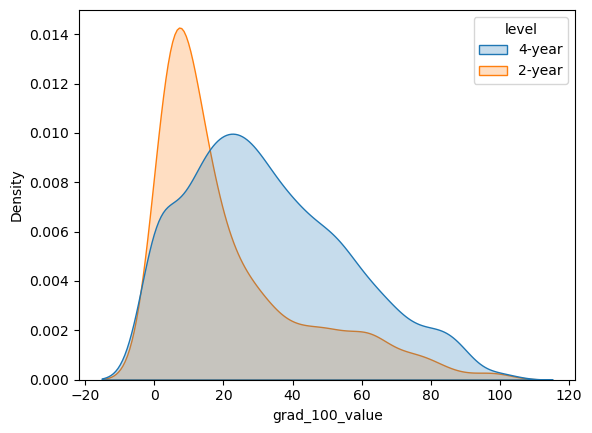

In [58]:
sns.kdeplot(data=df, x="grad_100_value", hue="level", fill=True)
plt.show()

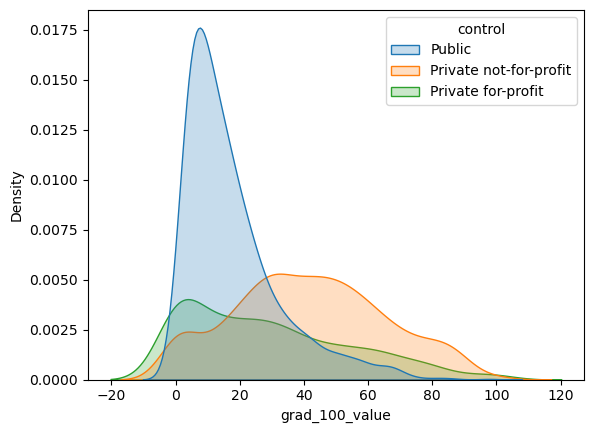

In [60]:
sns.kdeplot(data=df, x="grad_100_value", hue="control", fill=True)
plt.show()

In [40]:
df.loc[:,['control','level','grad_100_value']].groupby(['control','level']).describe()

grad_100_value                             \
                                       count       mean        std  min   
control                level                                              
Private for-profit     2-year          461.0  37.197614  25.497380  0.0   
                       4-year          318.0  17.382704  20.788525  0.0   
Private not-for-profit 2-year           68.0  41.913235  28.348302  0.0   
                       4-year         1121.0  41.645674  23.243453  0.0   
Public                 2-year          926.0  12.400000  10.893600  0.0   
                       4-year          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
control                level                                
Private for-profit     2-year  15.800  33.9  57.800  100.0  
                       4-year   0.000  12.5  26.325  100.0  
Private not-for-profit 2-year  16.225  44.4  61.200  100.0  
                       4-year  25.000  41.0  57.800  100.0  
Public                 2-year   5.100   9.4  16.175   97.8  
                       4-year  13.600  21.8  33.800   86.3

Overall, it appears that private not for profit institutions have the best graduation rates, espeically 2 year private not for profit institutions. 

Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

In [62]:
df['levelXcontrol']=df['level']+', '+df['control']

In [68]:
print(df.columns, '\n') # Checking that colum was added 

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

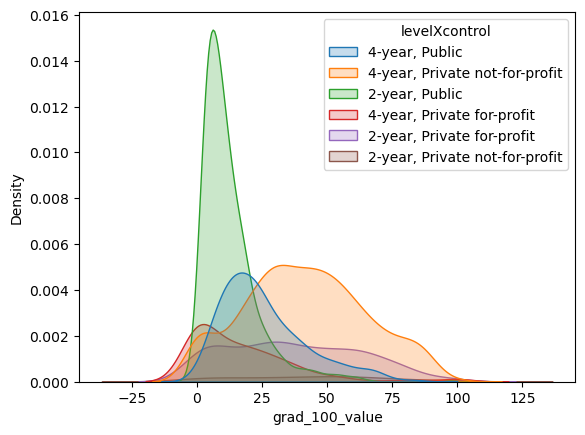

In [70]:
sns.kdeplot(data=df, x="grad_100_value", hue="levelXcontrol", fill=True)
plt.show()

4 year private not for profit appear to have the best graduation rates

Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

<Axes: ylabel='Density'>

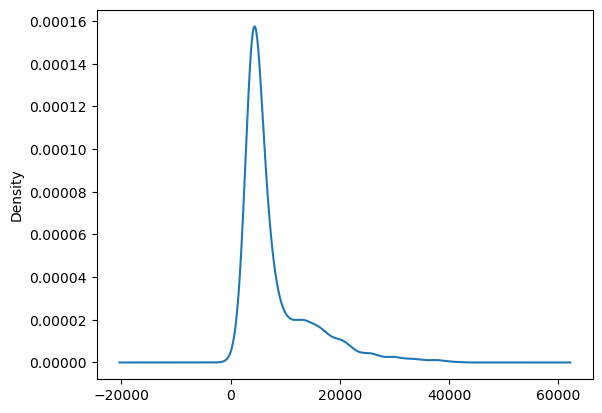

In [72]:
df['aid_value'].plot.kde()

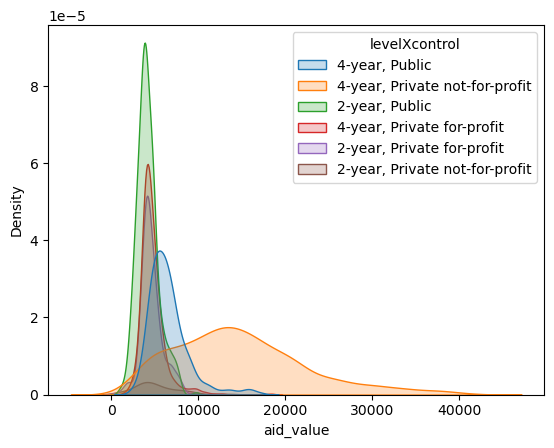

In [74]:
sns.kdeplot(data=df, x="aid_value", hue="levelXcontrol", fill=True)
plt.show()

In [76]:
df.loc[:,['control','level','aid_value']].groupby(['control','level']).describe()

aid_value                                     \
                                  count          mean          std     min   
control                level                                                 
Private for-profit     2-year     464.0   4559.681034  1286.688269   294.0   
                       4-year     527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year      68.0   5128.058824  2590.449946   934.0   
                       4-year    1180.0  14702.401695  7649.775203   902.0   
Public                 2-year     926.0   4126.199784  1260.271382   881.0   
                       4-year     632.0   6514.071203  2353.716693  2232.0   

                                                                    
                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                       4-year  3885.50   4364.0   5131.50  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9113.25  13774.5  18996.75  41580.0  
Public                 2-year  3311.25   3943.5   4762.00   9809.0  
                       4-year  4990.50   6085.0   7341.50  17299.0

Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

Text(0, 0.5, 'aid_value')

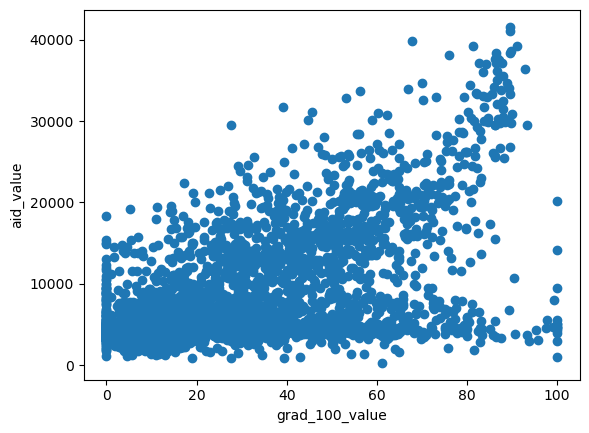

In [78]:
plt.scatter(df['grad_100_value'], df['aid_value'])
plt.xlabel("grad_100_value")
plt.ylabel("aid_value")

There appears to be a slight correlation with increasing aid, increasing graduation rates

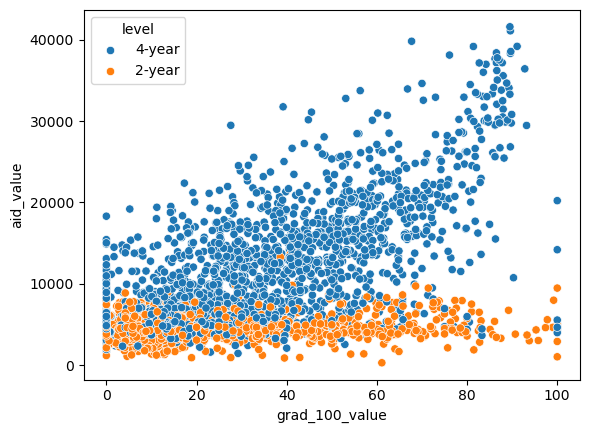

In [80]:
var1 = df['grad_100_value']
var2= df['aid_value']
cat1 = df['level']
this_plot = sns.scatterplot(data=df, x=var1, y=var2, hue=cat1)

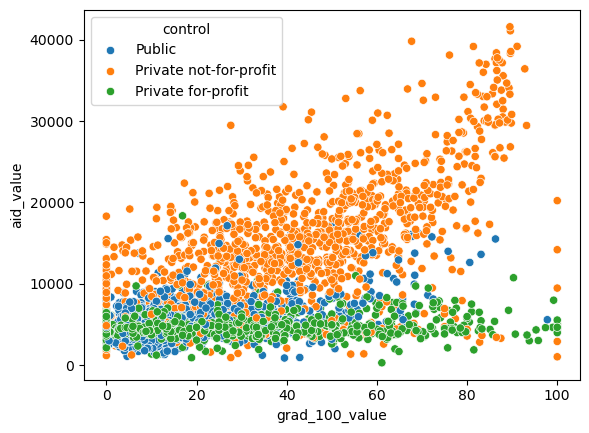

In [82]:
var1 = df['grad_100_value']
var2= df['aid_value']
cat1 = df['control']
this_plot = sns.scatterplot(data=df, x=var1, y=var2, hue=cat1)

Any correlation only appears for 4 year institutions and private not for profit institutions. For example, there does appear to be any correlation between aid and graduation rate for 2 year institutions or private for-profit institutions